# Problema 1

In [1]:
# Code
import numpy as np
import matplotlib.pyplot as plt

def phi(n,k,x):
    if n==2:
        val = x**k
    elif n==3:
        val = x**k
    return val

def normalfit(dataxs,datays,datasigs,n):
    N = dataxs.size
    A = np.zeros((N,n))
    for k in range(n):
        A[:,k] = phi(n,k,dataxs)/datasigs
    bs = datays/datasigs
    cs = np.linalg.solve(A.T@A, A.T@bs)
    chisq = np.sum((bs - A@cs)**2)
    return cs, chisq

np.random.seed(45379)
dataxs = np.array([34,27,65,20,53,49,42,31,55,61])
datays = np.array([4.5,3,7,3.5,8,5,4,4,5.5,7.5])
datasigs = 0.5

In [2]:
# inciso a)
for n in (2, 3):
    cs, chisq = normalfit(dataxs, datays, datasigs, n)
    print()
    print('El valor para \chi^2 es ', chisq)
    print('El valor para \chi^2 por grado de libertad es: ', chisq/(dataxs.size - cs.size))
    print('El valor de los parámetros c_i son ', cs)


El valor para \chi^2 es  28.077742228164848
El valor para \chi^2 por grado de libertad es:  3.509717778520606
El valor de los parámetros c_i son  [0.86777136 0.09913567]

El valor para \chi^2 es  26.76678602936764
El valor para \chi^2 por grado de libertad es:  3.8238265756239485
El valor de los parámetros c_i son  [2.55562255e+00 1.00858334e-02 1.03988794e-03]


In [13]:
# Modelos
# Inciso c)
cs_lineal = None
cs_cuadratico = None
for n in (2, 3):
    cs, chisq = normalfit(dataxs, datays, datasigs, n)

    if n == 2:
        cs_lineal = cs
    elif n == 3:
        cs_cuadratico = cs

modelo1 = lambda x, c0, c1: c0 + c1*x
modelo2 = lambda x, c0, c1, c2: c0 + c1*x + c2*x**2

print('La percepción de inseguridad de uno de 25 años es :', modelo1(25, *cs_lineal))
print('La percepción de inseguridad de uno de 70 años es :', modelo1(70, *cs_lineal))

La percepción de inseguridad de uno de 25 años es : 3.3461630294637312
La percepción de inseguridad de uno de 70 años es : 7.807268038775607


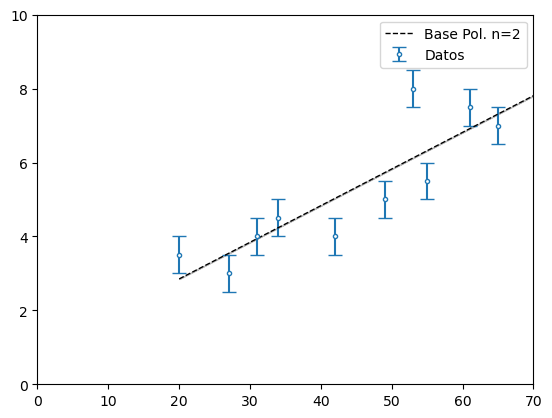

In [14]:
# Inciso b)
xval = np.linspace(20, 70, 100)
fig, ax = plt.subplots()
ax.errorbar(dataxs, datays, xerr=None, yerr=datasigs, capsize=5, ls='', marker='o', mfc='white', ms=3, mew=1, label=r'Datos')
ax.plot(xval, modelo1(xval, *cs_lineal), ls='--', lw=1, c='k', label=r'Base Pol. n=%d'%len(cs_lineal))

ax.set_xlim(0, 70)
ax.set_ylim(0, 10)
plt.legend()
plt.show()

In [15]:
# inciso d)
# Correlación de variables
Sxy = np.cov(dataxs, datays)[0, 1]
Sx = np.std(dataxs)
Sy = np.std(datays)
coefPer = Sxy / (Sx * Sy)

print('La correlación entre las variables es: ', coefPer)

La correlación entre las variables es:  0.9594704202524238


In [19]:
# inciso e)
# Residuos
# Calcula los valores predichos por el modelo para todas las edades
predicciones = [modelo1(x, *cs_lineal) for x in dataxs]

# Calculamos los residuos para todas las edades
residuos = [datays[i] - predicciones[i] for i in range(len(datays))]

# Encontramos el índice del mayor residuo
indice_mayor_residuo = residuos.index(max(residuos))

# Encontramos el valor de la edad correspondiente al mayor residuo
edad_mayor_residuo = dataxs[indice_mayor_residuo]

print('El valor de la edad que presenta mayor residuo es: ', edad_mayor_residuo)
print('El valor del mayor residuo es: ', max(residuos))
print()

# Imprime todas las edades y sus respectivos residuos
for i in range(len(dataxs)):
    print('Edad: ', dataxs[i], ', Residuo: ', residuos[i])

El valor de la edad que presenta mayor residuo es:  53
El valor del mayor residuo es:  1.8780382980755457

Edad:  34 , Residuo:  0.26161596867389303
Edad:  27 , Residuo:  -0.5444343632109261
Edad:  65 , Residuo:  -0.3115897044076217
Edad:  20 , Residuo:  0.6495153049042548
Edad:  53 , Residuo:  1.8780382980755457
Edad:  49 , Residuo:  -0.7254190344300655
Edad:  42 , Residuo:  -1.0314693663148846
Edad:  31 , Residuo:  0.05902296929468509
Edad:  55 , Residuo:  -0.8202330356716487
Edad:  61 , Residuo:  0.584952963086768


# Problema 2

In [29]:
np.random.seed(45379) # Dejamos la misma semilla 45379
dataxs = np.array([200,220,400,330,210,390,280,140,280,290,380])
datays = np.array([9,6,12,7,5,10,8,4,7,10,14])
datasigs = 0.5

# inciso a)
for n in (2, 3):
    cs, chisq = normalfit(dataxs, datays, datasigs, n)
    print()
    print('El valor para \chi^2 es ', chisq)
    print('El valor para \chi^2 por grado de libertad es: ', chisq/(dataxs.size - cs.size))
    print('El valor de los parámetros c_i son ', cs)


El valor para \chi^2 es  129.86930693069309
El valor para \chi^2 por grado de libertad es:  14.429922992299232
El valor de los parámetros c_i son  [0.38811881 0.02811881]

El valor para \chi^2 es  127.49777985405316
El valor para \chi^2 por grado de libertad es:  15.937222481756645
El valor de los parámetros c_i son  [3.06698241e+00 7.26158688e-03 3.71525901e-05]


In [45]:
# Modelos
cs_lineal = None
cs_cuadratico = None
for n in (2, 3):
    cs, chisq = normalfit(dataxs, datays, datasigs, n)

    if n == 2:
        cs_lineal = cs
    elif n == 3:
        cs_cuadratico = cs

modelo1 = lambda x, c0, c1: c0 + c1*x
modelo2 = lambda x, c0, c1, c2: c0 + c1*x + c2*x**2

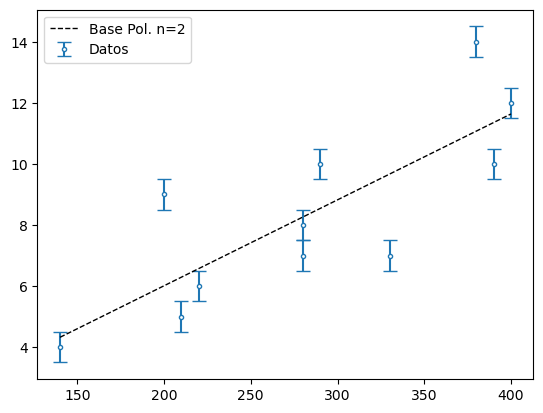

In [46]:
# Inciso b)
xval = np.linspace(min(dataxs), max(dataxs), 100)
fig, ax = plt.subplots()
ax.errorbar(dataxs, datays, xerr=None, yerr=datasigs, capsize=5, ls='', marker='o', mfc='white', ms=3, mew=1, label=r'Datos')
ax.plot(xval, modelo1(xval, *cs_lineal), ls='--', lw=1, c='k', label=r'Base Pol. n=%d'%len(cs_lineal))

plt.legend()
plt.show()

In [47]:
# inciso c)
# Correlación de variables
Sxy = np.cov(dataxs, datays)[0, 1]
Sx = np.std(dataxs)
Sy = np.std(datays)
coefPer = Sxy / (Sx * Sy)

print('La correlación entre las variables es: ', coefPer)

La correlación entre las variables es:  0.8809792158177914


# Problema 3

La recta de regresión es y = -0.5535203262980417 + 0.805878402738279x


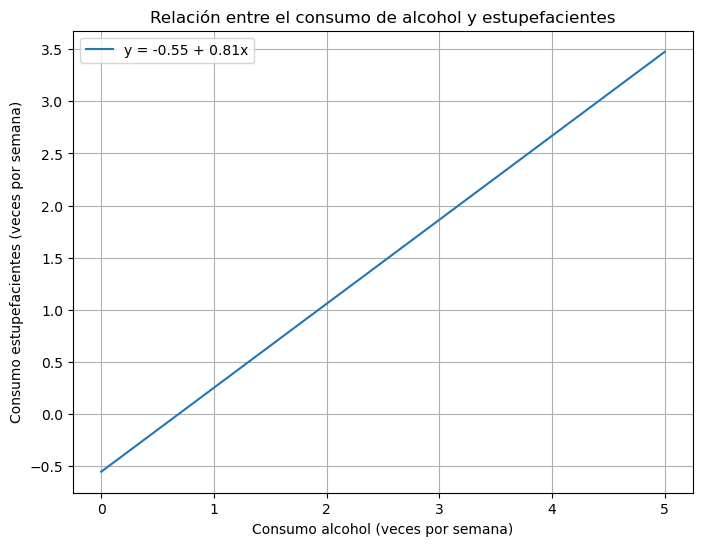

In [50]:
# Datos
media_x = 2.3  # Media del consumo de alcohol
Sx = 2.5  # Desviación estándar del consumo de alcohol
media_y = 1.3  # Media del consumo de otros estupefacientes
Sy = 3  # Desviación estándar del consumo de otros estupefacientes
r_squared = 0.451  # Coeficiente de determinación

r = np.sqrt(r_squared)

# Calcular los coeficientes de la recta de regresión lineal
c1 = r * (Sy / Sx)
c0 = media_y - c1 * media_x

print(f"La recta de regresión es y = {c0} + {c1}x")

x_values = np.linspace(0, 5, 100)

# Calculamos los valores de y para la gráfica
y_values = c0 + c1 * x_values

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label=f'y = {c0:.2f} + {c1:.2f}x')
plt.title('Relación entre el consumo de alcohol y estupefacientes')
plt.xlabel('Consumo alcohol (veces por semana)')
plt.ylabel('Consumo estupefacientes (veces por semana)')
plt.legend()
plt.grid(True)
plt.show()

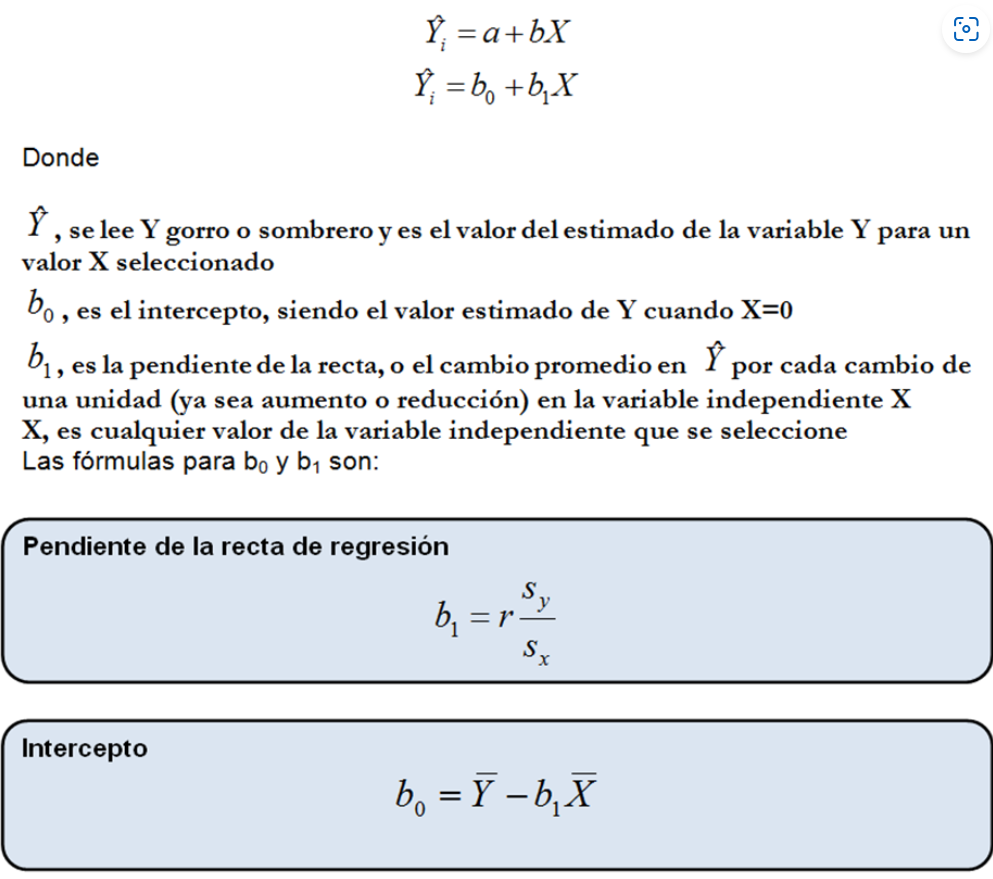